In [8]:
import pandas as pd
i=1
for chunk in pd.read_csv("Waypoints.csv",chunksize=10000000):
    chunk.to_csv(f"Chunks/Chunk{i}.csv",index=False)
    i+=1

In [17]:
import pandas as pd
ChunkArray=[]
i=1
while(i<=53):
    chunk=pd.read_csv(f"Chunks/Chunk{i}.csv")
    df=chunk.iloc[:,3:6]
    chunk_no_duplicates=df.drop_duplicates(keep='first')
    chunk_no_duplicates=chunk_no_duplicates.reset_index()
    chunk_no_duplicates.drop(['index'],axis=1,inplace=True)
    ChunkArray.append(chunk_no_duplicates)
    print(f"Chunk{i} Done")
    i+=1
AllChunks=pd.concat(ChunkArray)
AllChunks=AllChunks.reset_index()
AllChunks.drop(['index'],axis=1,inplace=True)

Chunk1 Done
Chunk2 Done
Chunk3 Done
Chunk4 Done
Chunk5 Done
Chunk6 Done
Chunk7 Done
Chunk8 Done
Chunk9 Done
Chunk10 Done
Chunk11 Done
Chunk12 Done
Chunk13 Done
Chunk14 Done
Chunk15 Done
Chunk16 Done
Chunk17 Done
Chunk18 Done
Chunk19 Done
Chunk20 Done
Chunk21 Done
Chunk22 Done
Chunk23 Done
Chunk24 Done
Chunk25 Done
Chunk26 Done
Chunk27 Done
Chunk28 Done
Chunk29 Done
Chunk30 Done
Chunk31 Done
Chunk32 Done
Chunk33 Done
Chunk34 Done
Chunk35 Done
Chunk36 Done
Chunk37 Done
Chunk38 Done
Chunk39 Done
Chunk40 Done
Chunk41 Done
Chunk42 Done
Chunk43 Done
Chunk44 Done
Chunk45 Done
Chunk46 Done
Chunk47 Done
Chunk48 Done
Chunk49 Done
Chunk50 Done
Chunk51 Done
Chunk52 Done
Chunk53 Done


In [55]:
dfWayPoints=AllChunks.drop_duplicates(keep='first')
dfWayPoints=dfWayPoints.reset_index()
dfWayPoints.drop(['index'],axis=1,inplace=True)
dfWayPoints.to_csv("WAYPOINT_FILE.csv",index=False)

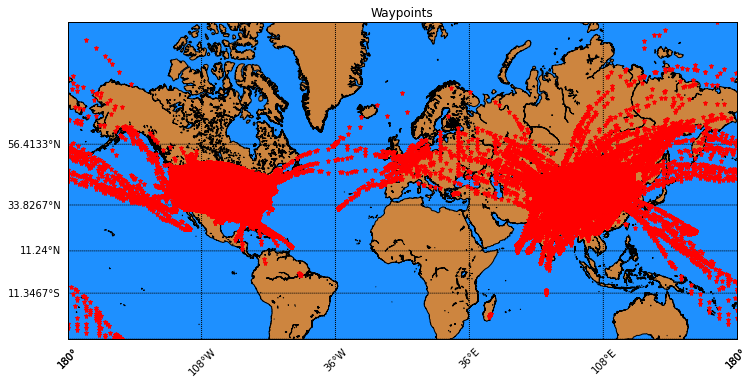

In [56]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
lats, lons = [],[]
with open('WAYPOINT_FILE.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        lats.append(float(data['latitude']))
        lons.append(float(data['longitude']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("Waypoints")
plt.savefig('figure.png', format='png', dpi=500)
plt.show()

In [61]:
df=pd.read_csv("WAYPOINT_FILE.csv")
dfUS=df[(df.latitude >= 24) & (df.latitude <= 50) & (df.longitude >= -126) & (df.longitude <= -66)]
dfUS=dfUS.reset_index()
dfUS.drop(['index'],axis=1,inplace=True)
dfUS.to_csv("WAYPOINT_FILE_US.csv",index=False)

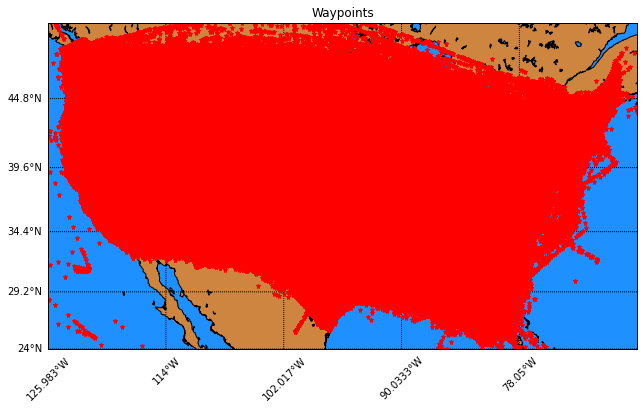

In [62]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
lats, lons = [],[]
with open('WAYPOINT_FILE_US.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        lats.append(float(data['latitude']))
        lons.append(float(data['longitude']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lons,lats)
m.plot(x,y,'r*',markersize=5)
plt.title("Waypoints")
plt.savefig('figure.png', format='png', dpi=500)
plt.show()

In [63]:
dfE=pd.DataFrame()
dfE['easting']=x
dfE['northing']=y

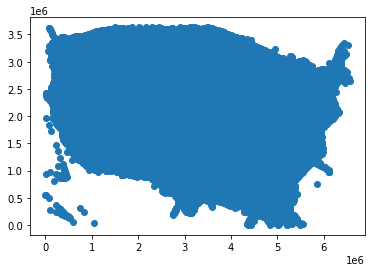

In [64]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [66]:
dfE.to_csv("East_File.csv",index=False)

In [68]:
import pandas as pd
dfE=pd.read_csv("East_File.csv")

In [63]:
df5_1=dfE[(dfE['easting']>=4000000) & (dfE['easting']<5000000) & (dfE['northing']>=0) & (dfE['northing'] < 800000)]
df5_1=df5_1.reset_index()
df5_1.drop(['index'],axis=1,inplace=True)
df5_1.to_csv("ChunksClustering/Chunk5_1.csv",index=False)

In [64]:
df5_2=dfE[(dfE['easting']>=4000000) & (dfE['easting']<5000000) & (dfE['northing']>=800000) & (dfE['northing'] < 1250000)]
df5_2=df5_2.reset_index()
df5_2.drop(['index'],axis=1,inplace=True)
df5_2.to_csv("ChunksClustering/Chunk5_2.csv",index=False)

In [70]:
df5_3=dfE[(dfE['easting']>=4000000) & (dfE['easting']<5000000) & (dfE['northing']>=1250000) & (dfE['northing'] < 1700000)]
df5_3=df5_3.reset_index()
df5_3.drop(['index'],axis=1,inplace=True)
df5_3.to_csv("ChunksClustering/Chunk5_3.csv",index=False)

In [76]:
df5_4=dfE[(dfE['easting']>=4000000) & (dfE['easting']<5000000) & (dfE['northing']>=1700000) & (dfE['northing'] < 2150000)]
df5_4=df5_4.reset_index()
df5_4.drop(['index'],axis=1,inplace=True)
df5_4.to_csv("ChunksClustering/Chunk5_4.csv",index=False)

In [80]:
df5_5=dfE[(dfE['easting']>=4000000) & (dfE['easting']<5000000) & (dfE['northing']>=2150000) & (dfE['northing'] < 2700000)]
df5_5=df5_5.reset_index()
df5_5.drop(['index'],axis=1,inplace=True)
df5_5.to_csv("ChunksClustering/Chunk5_5.csv",index=False)

In [82]:
df5_6=dfE[(dfE['easting']>=4000000) & (dfE['easting']<5000000) & (dfE['northing']>=2700000) & (dfE['northing'] < 4000000)]
df5_6=df5_6.reset_index()
df5_6.drop(['index'],axis=1,inplace=True)
df5_6.to_csv("ChunksClustering/Chunk5_6.csv",index=False)

In [5]:
from sklearn.cluster import SpectralClustering
def getLabel(Chunk):
    sk=SpectralClustering(n_clusters=5 , affinity = "nearest_neighbors")
    label=sk.fit_predict(Chunk)
    return label

In [6]:
import distinctipy as ds
import matplotlib.pyplot as plt
def getCVec(label):
    colors=ds.get_colors(5)
    cvec=[colors[i] for i in label]
    return cvec

In [72]:
FileNames=["Chunk1_1.csv","Chunk1_2.csv","Chunk2_1.csv","Chunk2_2.csv","Chunk2_3.csv","Chunk2_4.csv","Chunk3_1.csv","Chunk3_2.csv","Chunk3_3.csv","Chunk3_4.csv","Chunk4_1.csv","Chunk4_2.csv","Chunk4_3.csv","Chunk4_4.csv","Chunk4_5.csv","Chunk5_1.csv","Chunk5_2.csv","Chunk5_3.csv","Chunk5_4.csv","Chunk5_5.csv","Chunk5_6.csv","Chunk6_1.csv","Chunk6_2.csv","Chunk6_3.csv","Chunk7_1.csv"]

/home/rahul/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


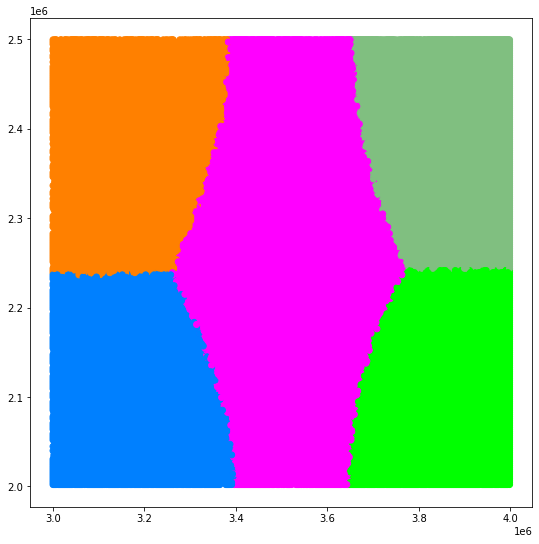

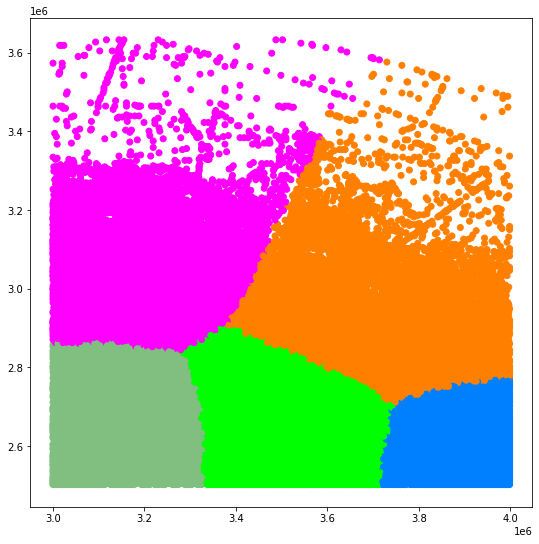

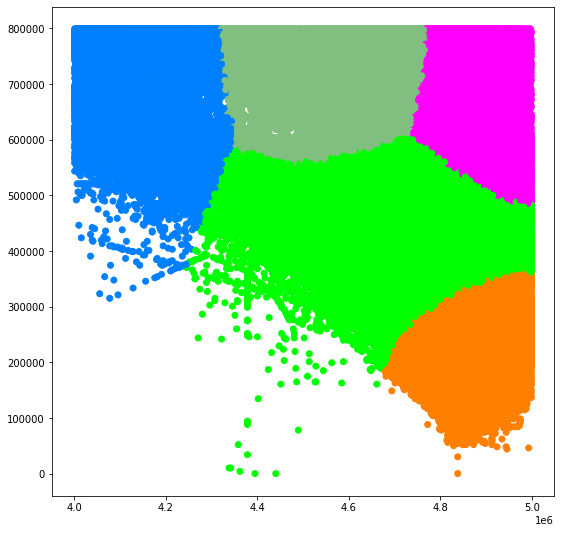

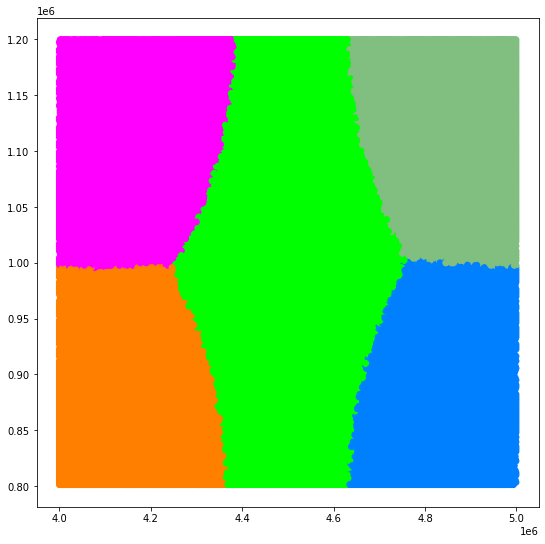

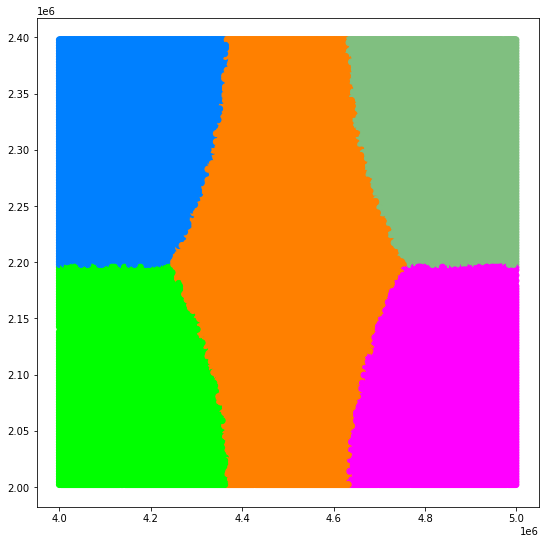

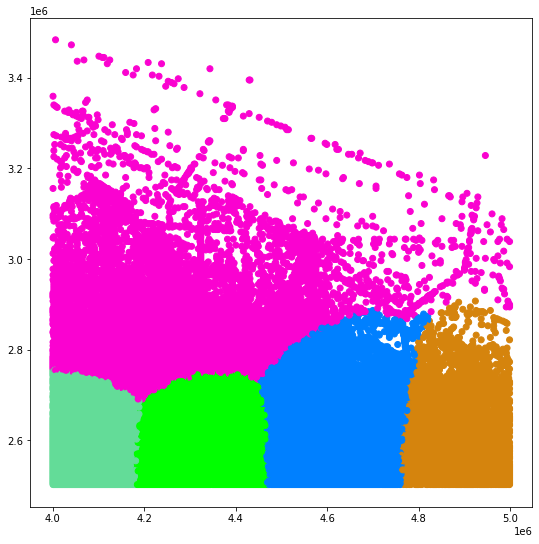

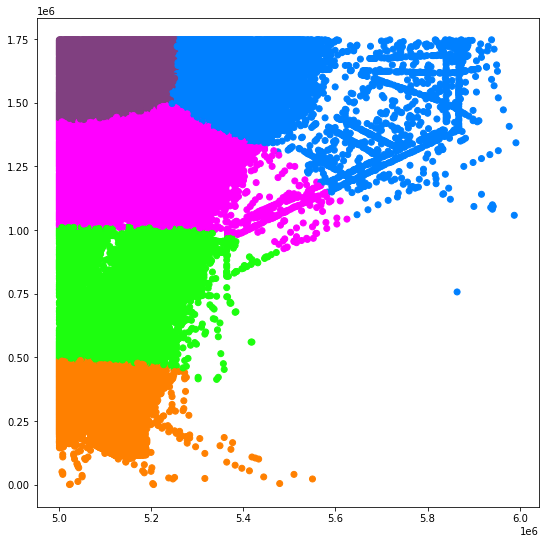

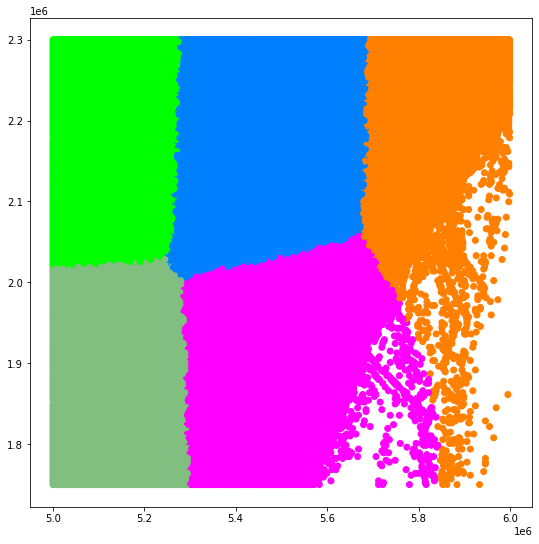

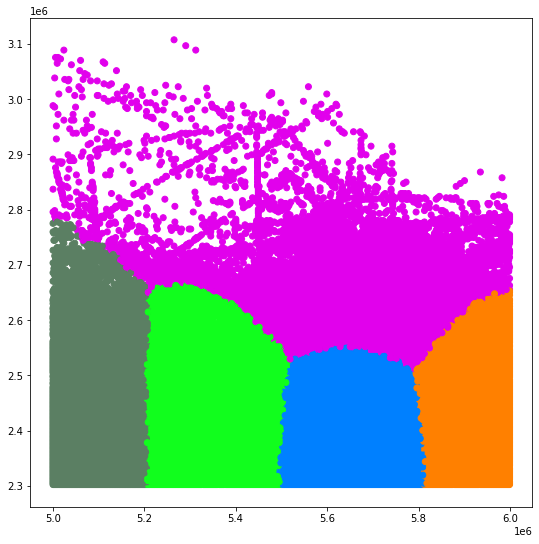

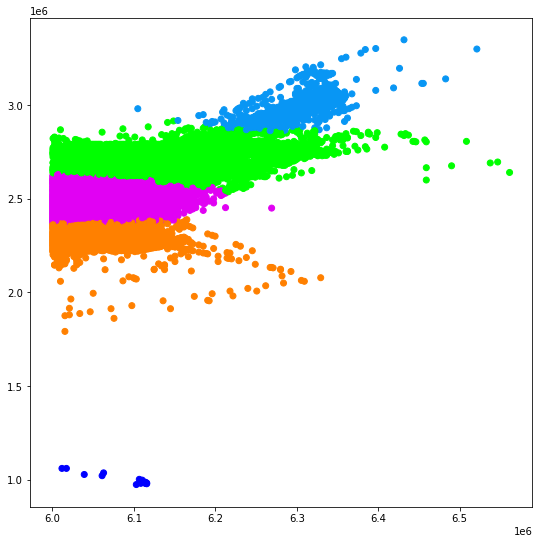

In [73]:
for File in FileNames:
    df=pd.read_csv(f"ChunksClustering/{File}")
    label=getLabel(df)
    cvec=getCVec(label)
    plt.figure(figsize=(9,9))
    plt.scatter(df['easting'],df['northing'],c=cvec)
    plt.savefig(File[:len(File)-3]+"png")
    df['label']=label
    df.to_csv(f"ChunksClustering/{File}",index=False)